<a href="https://colab.research.google.com/github/mkbahk/QuantumComputing/blob/main/QuantumSubroutineAlgorithms_QAE_ChatGPT_mkbahk_20250812.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%pip install qiskit[visualization]==1.2.4
%pip install qiskit-aer==0.15.1
%pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

  Cloning https://github.com/qiskit-community/qiskit-textbook.git to /tmp/pip-req-build-pscsd4g3
  Running command git clone --filter=blob:none --quiet https://github.com/qiskit-community/qiskit-textbook.git /tmp/pip-req-build-pscsd4g3
  Resolved https://github.com/qiskit-community/qiskit-textbook.git to commit 0ae905083ec3872d7ddc6bb4001d5468f476d93f
  Preparing metadata (setup.py) ... done


In [3]:
%pip install qiskit-algorithms==0.3.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.5/310.5 kB 5.5 MB/s eta 0:00:00


In [18]:
"""
Quantum Amplitude Estimation (QAE) sample using Qiskit

This file demonstrates how to run a near-term-friendly QAE algorithm (Maximum Likelihood
Amplitude Estimation) to estimate the probability 'p' of measuring |1> for a single-qubit
state prepared by a simple circuit A.

Requirements:
  pip install qiskit qiskit-aer

Tested API pattern (Qiskit Algorithms / Primitives):
  - qiskit.primitives.Sampler
  - qiskit.algorithms.EstimationProblem
  - qiskit.algorithms.amplitude_estimators.MaximumLikelihoodAmplitudeEstimation

"""

"\nQuantum Amplitude Estimation (QAE) sample using Qiskit\n\nThis file demonstrates how to run a near-term-friendly QAE algorithm (Maximum Likelihood\nAmplitude Estimation) to estimate the probability 'p' of measuring |1> for a single-qubit\nstate prepared by a simple circuit A.\n\nRequirements:\n  pip install qiskit qiskit-aer\n\nTested API pattern (Qiskit Algorithms / Primitives):\n  - qiskit.primitives.Sampler\n  - qiskit.algorithms.EstimationProblem\n  - qiskit.algorithms.amplitude_estimators.MaximumLikelihoodAmplitudeEstimation\n\n"

In [19]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile, assemble
from qiskit.quantum_info import Statevector, Operator
from qiskit.visualization import plot_histogram, plot_state_city, plot_bloch_multivector
from qiskit_textbook.tools import array_to_latex
from qiskit_aer import Aer, AerSimulator
from IPython.display import display, Math
import numpy as np

#from qiskit.primitives import Sampler

In [20]:
from math import asin, sqrt

#from qiskit import QuantumCircuit
from qiskit.primitives import Sampler
from qiskit_algorithms import EstimationProblem
from qiskit_algorithms.amplitude_estimators import MaximumLikelihoodAmplitudeEstimation

In [21]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
def make_state_preparation(p: float) -> QuantumCircuit:
    """Return a 1-qubit circuit A that prepares sqrt(p)|1> + sqrt(1-p)|0>.

    We use an Ry rotation: Ry(theta)|0> = cos(theta/2)|0> + sin(theta/2)|1>
    so choose theta = 2*asin(sqrt(p)) so that sin(theta/2) = sqrt(p).
    """
    if not 0 <= p <= 1:
        raise ValueError("p must be in [0,1]")
    ###if

    theta = 2 * asin(sqrt(p))
    qc = QuantumCircuit(1, name="A")
    qc.ry(theta, 0)
    return qc
###def

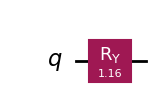

In [23]:
make_state_preparation(0.3).draw("mpl")

In [24]:
def run_mlae_example(true_p: float = 0.3):
    # 1) Build state-preparation circuit A
    A = make_state_preparation(true_p)

    # 2) Define the estimation problem: we want the amplitude of basis state |1>
    problem = EstimationProblem(state_preparation=A, objective_qubits=[0])

    # 3) Create a sampler primitive (uses local simulator by default)
    sampler = Sampler()

    # 4) Create the MLAE algorithm instance.
    #    evaluation_schedule controls which powers of the Grover operator are used.
    #    You can pass an integer (log2(max_power)) or a list. Here `evaluation_schedule=3`
    #    is a small demonstration value.
    mlae = MaximumLikelihoodAmplitudeEstimation(evaluation_schedule=3, sampler=sampler)

    # 5) Run the estimation
    result = mlae.estimate(problem)

    # 6) Report results
    print("True p:", true_p)
    print("Estimated p:", result.estimation)
    print("95% confidence interval:", result.confidence_interval)
###def

In [25]:
if __name__ == "__main__":
    # Try a few example probabilities to see behavior
    for p in (0.05, 0.2, 0.3, 0.7):
        print("--------------------------------------------")
        run_mlae_example(true_p=p)
    ###for
###if

--------------------------------------------
True p: 0.05
Estimated p: 0.0500048786253198
95% confidence interval: (np.float64(0.0500048786253198), np.float64(0.0500048786253198))
--------------------------------------------
True p: 0.2
Estimated p: 0.20002237175368104
95% confidence interval: (np.float64(0.20002237175368104), np.float64(0.20002237175368104))
--------------------------------------------
True p: 0.3
Estimated p: 0.29999255431916677
95% confidence interval: (np.float64(0.29999255431916677), np.float64(0.29999255431916677))
--------------------------------------------
True p: 0.7
Estimated p: 0.7000442682644334
95% confidence interval: (np.float64(0.7000442682644334), np.float64(0.7000442682644334))
